In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importamos los paquetes

In [3]:
"""Importamos los datos de entrenamiento y de testeo"""
dt = pd.read_csv('Datasets/MobilePriceCl/train.csv')
test = pd.read_csv('Datasets/MobilePriceCl/test.csv')

# Reconocimiento de los datos

In [4]:
"""Revisamos la tabla de entrenamiento"""
dt.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
"""Revisamos la tabla de testeo"""
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [6]:
"""Usamos describe para revisar los valores de los datos"""
dt.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
"""Usamos describe para revisar los valores de set de datos de testeo"""
test.describe()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


In [8]:
"""Revisamos si los datos de prueba de la columna a predecir estan balanceados"""
dt.groupby('price_range').size()

price_range
0    500
1    500
2    500
3    500
dtype: int64

In [9]:
"""Revisamos si existen datos corruptos"""
dt.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
test.isna().sum()

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64

In [11]:
"Tipo de dato de cada columna"
dt.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

C:\Users\Stefano\AppData\Local\Temp\ipykernel_15292\1049332066.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dt.hist(ax = ax)


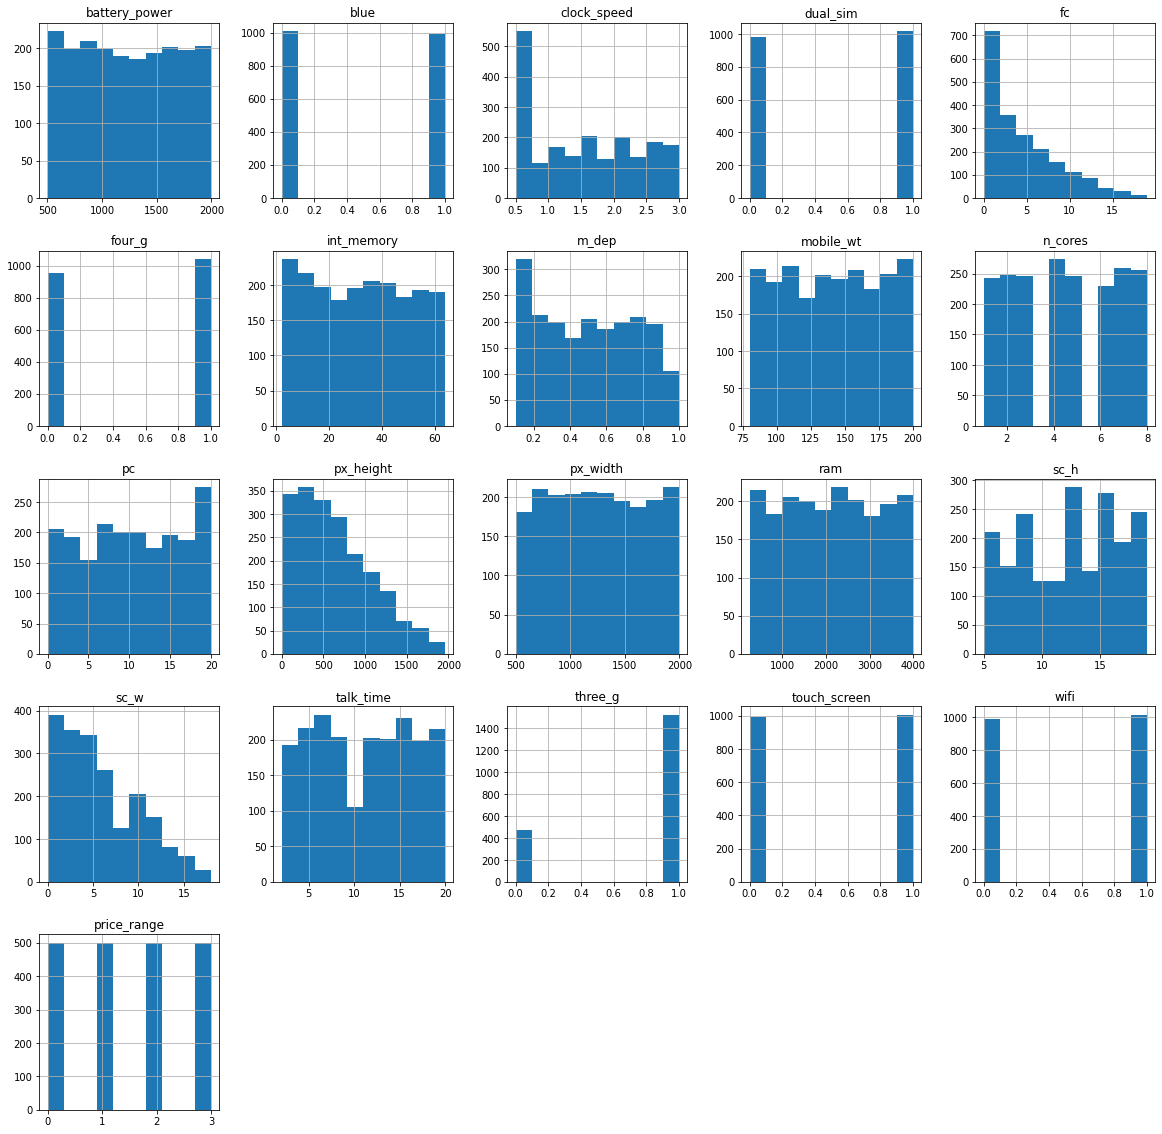

In [12]:
"""Distribucion de los datos de prueba"""
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (20,20))
ax = fig.gca()
dt.hist(ax = ax)
plt.show()

C:\Users\Stefano\AppData\Local\Temp\ipykernel_15292\531661620.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  test.hist(ax = ax)


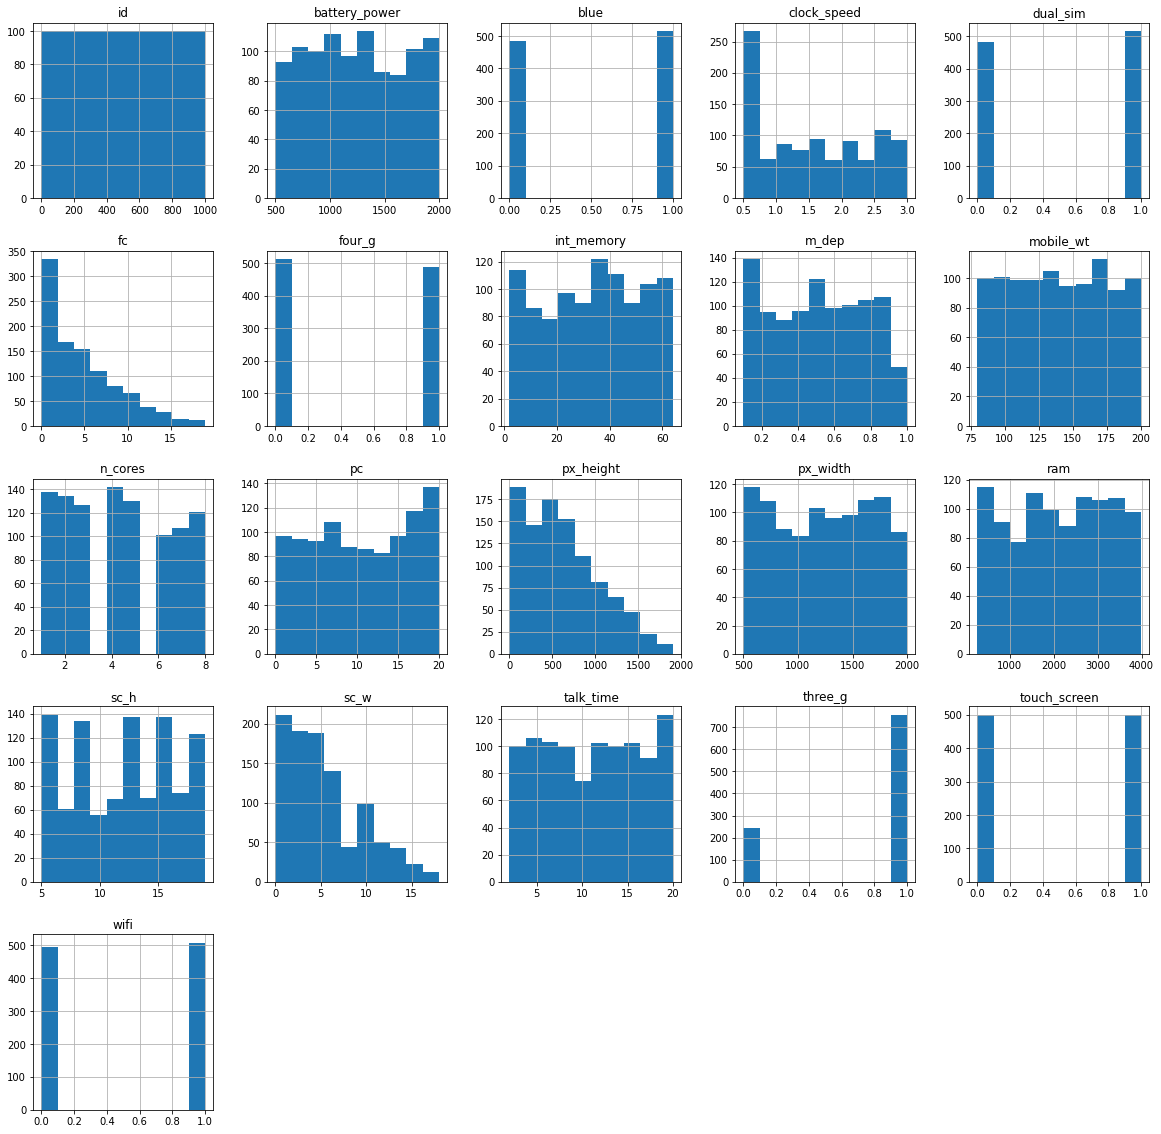

In [13]:
"""Distribucion de los datos de testeo"""
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
test.hist(ax = ax)
plt.show()

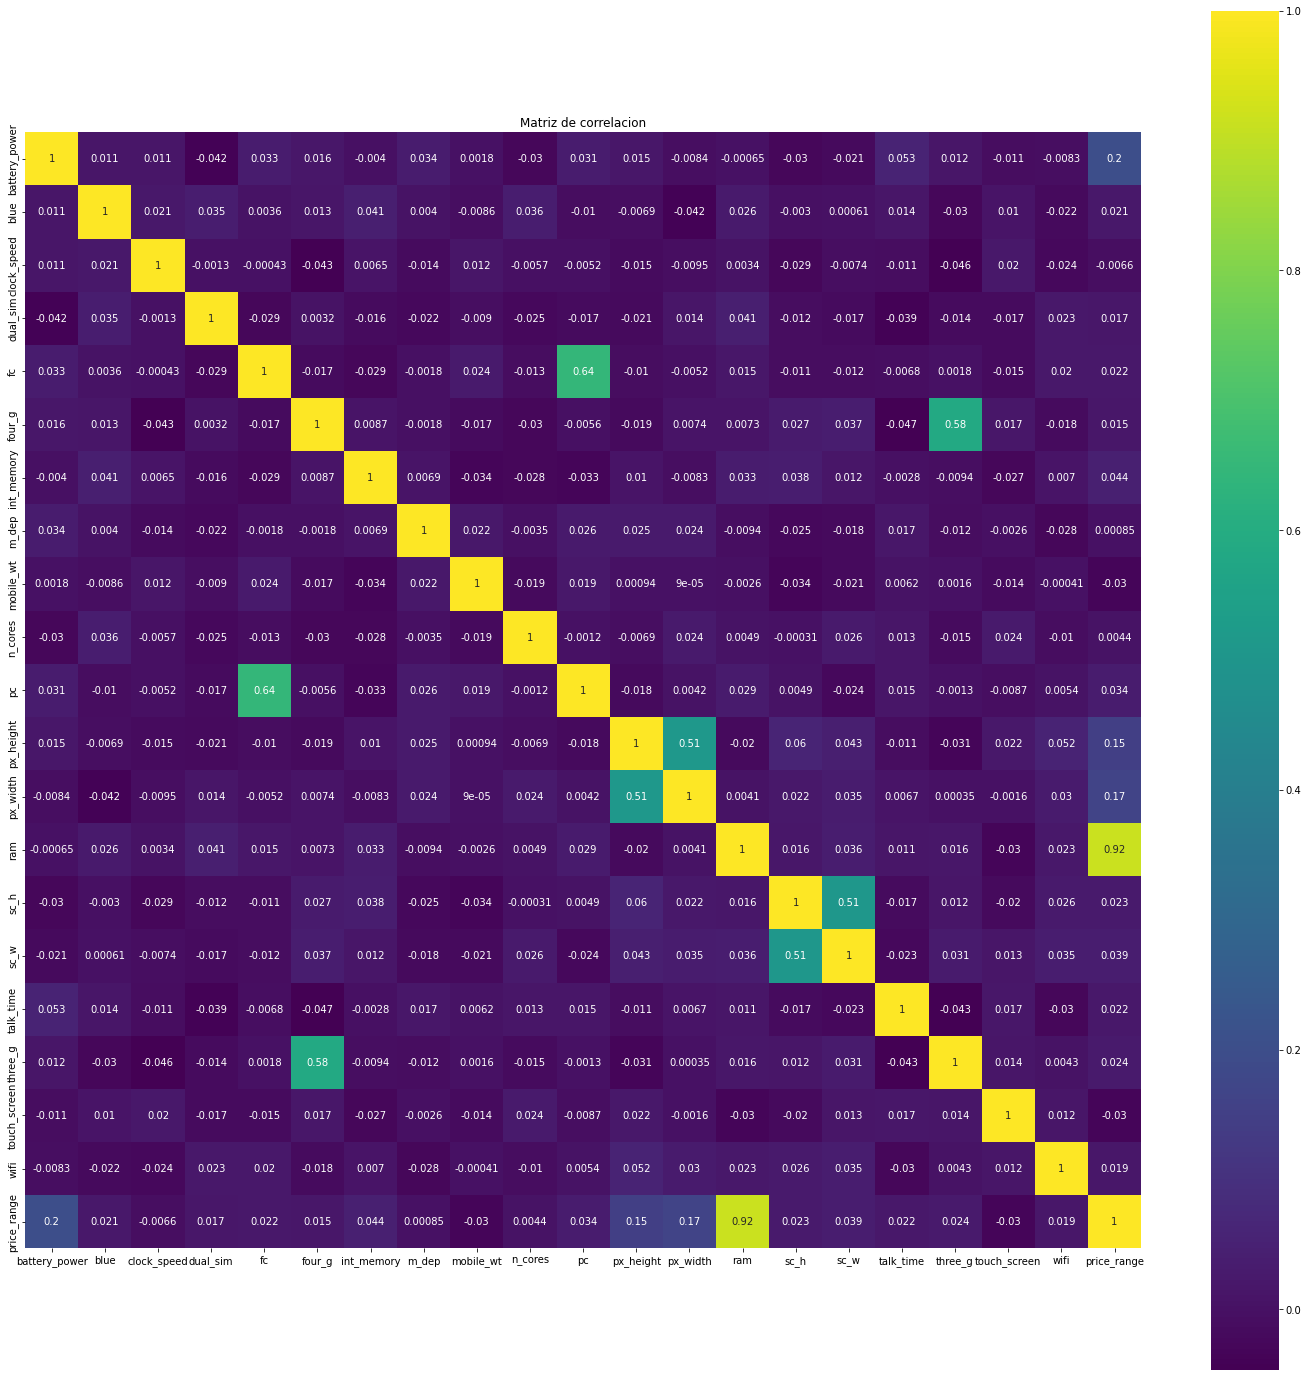

In [14]:
"""Correlacion de los datos"""
import seaborn as sns
cor = dt.corr()
plt.figure(figsize=(25,25))
ax = sns.heatmap(cor, vmax=1, square=True, annot=True, cmap='viridis')
plt.title("Matriz de correlacion")
plt.show()

# Analisis de los datos

In [17]:
Bl = dt['blue'].value_counts()

Text(0.5, 1.0, 'Tiene Bluetooth')

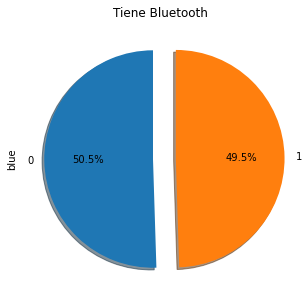

In [42]:
Bl.plot.pie(startangle = 90, shadow = True, explode = (0.07,0.14), autopct = '%1.1f%%',figsize = (5,5))
plt.title('Tiene Bluetooth')

In [19]:
Cs = dt['clock_speed'].value_counts()

Text(0.5, 1.0, 'Microprocessor executes')

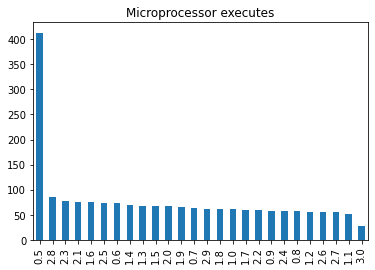

In [20]:
ax = plt.subplots()
Cs.plot.bar()
plt.title('Microprocessor executes')

In [21]:
Ds = dt['dual_sim'].value_counts()

Text(0.5, 1.0, 'Has dual sim support or not')

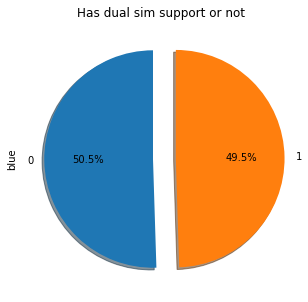

In [22]:
Bl.plot.pie(startangle = 90, shadow = True, explode = (0.07,0.14), autopct = '%1.1f%%',figsize = (5,5))
plt.title('Has dual sim support or not')

In [23]:
Fc = dt['fc'].value_counts().head(20)

Text(0.5, 1.0, 'Front Camera mega pixels')

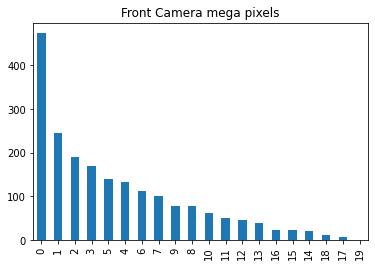

In [24]:
ax = plt.subplots()
Fc.plot.bar()
plt.title('Front Camera mega pixels')

In [25]:
Fg = dt['four_g'].value_counts()

Text(0.5, 1.0, 'Has 4G or not')

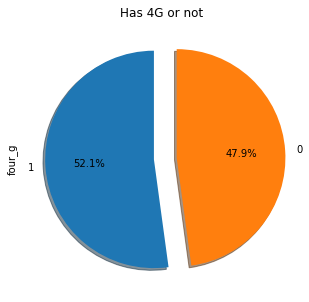

In [26]:
Fg.plot.pie(startangle = 90, shadow = True, explode = (0.07,0.14), autopct = '%1.1f%%',figsize = (5,5))
plt.title('Has 4G or not')

In [27]:
Im = dt['int_memory'].value_counts().head(15)

Text(0.5, 1.0, 'Internal Memory in Gigabytes')

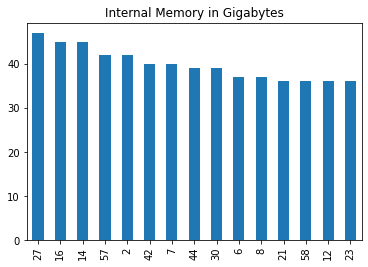

In [28]:
ax = plt.subplots()
Im.plot.bar()
plt.title('Internal Memory in Gigabytes')

In [29]:
Md = dt['m_dep'].value_counts().head(15)

Text(0.5, 1.0, 'Mobile Depth in cm')

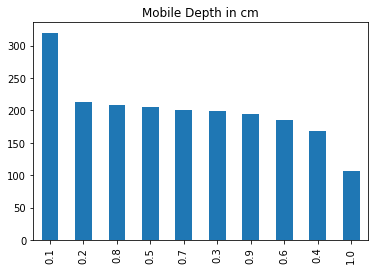

In [30]:
ax = plt.subplots()
Md.plot.bar()
plt.title('Mobile Depth in cm')

In [31]:
Mw = dt['mobile_wt'].value_counts().head(15)

Text(0.5, 1.0, 'Weight of mobile phone')

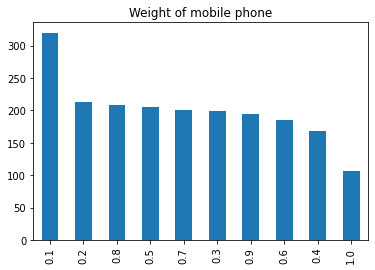

In [32]:
ax = plt.subplots()
Md.plot.bar()
plt.title('Weight of mobile phone')

In [33]:
Nc = dt['n_cores'].value_counts()
Nc

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

# Preprocesamiento

In [34]:
"""Convertimos nuestros datos en una array"""
array = dt.values
array2 = test.values

"""Dividimos nuestros datos de entrenamiento y test"""
X = array[: , 0:20]
Y = array[: , 20]

X_test = array2[: , 0:20]

In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = MinMaxScaler(feature_range=(0,1))
rescalerX = scaler.fit_transform(X)

estandar = StandardScaler().fit(rescalerX)
estandarX = estandar.transform(rescalerX)

X = estandarX

In [36]:
scalerTest = MinMaxScaler(feature_range=(0,1))
rescalerXTest = scalerTest.fit_transform(X_test)

estandarScalerTest = StandardScaler().fit(rescalerXTest)
estandarXTest = estandarScalerTest.transform(rescalerXTest)

X_test = estandarXTest

# Modelado

In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC




"""Creamos una lista y metemos cada uno de los modelos a usar"""
models = []
models.append(('LoR', LogisticRegression(solver="lbfgs", max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CAR', DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []
scoring = 'accuracy'
"""Creamos un bucle que recorra la lista de modelos y nombres"""
for name, model in models:
    """Entrenamos nuestro modelo"""
    kfold = KFold(n_splits=10)
    """Calculamos el porcentaje de la prediccion"""
    result =  cross_val_score(model, X, Y,  cv=kfold)
    results.append(result)
    names.append(name)
    print(f"{name}: {result.mean()*100.0:,.2f} ({result.std()*100.0:,.2f})")

LoR: 96.20 (0.84)
LDA: 94.55 (0.96)
KNN: 50.60 (2.11)
CAR: 83.35 (1.91)
NB: 81.00 (2.02)
SVM: 88.30 (1.86)


In [38]:
"""Usamos el modelo con mayor porcentaje de prediccion"""
Lr= LogisticRegression()
Lr.fit(X, Y)
Y_pred = Lr.predict(X_test)
Logistic_Regression = round(Lr.score(X, Y) * 100, 2)
print(Logistic_Regression)

97.85


# Datos testeo

In [39]:
"""Creamos un tabla con los datos de la prediccion"""
DataframeTestPredict = pd.DataFrame(Y_pred, columns=["Predict"] )
"La concadenamos con el set de datos de testeo"
DataframeTest = pd.concat([test, DataframeTestPredict], sort = False)

In [40]:
"""Contamos las clases del set de datos"""
mobileCounts = DataframeTest['Predict'].value_counts()
mobileCounts

3.0    284
0.0    273
1.0    228
2.0    215
Name: Predict, dtype: int64

Text(0.5, 1.0, 'Clasificacion Telefonos')

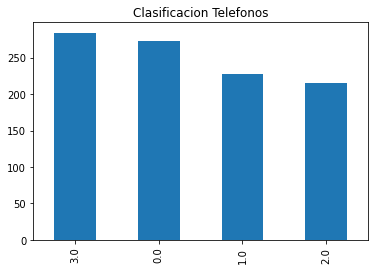

In [41]:
"""Ploteamos un grafico de barras para observar los datos"""
ax = plt.subplots()
mobileCounts.plot.bar()
plt.title('Clasificacion Telefonos')

# Conclusion 

Como conclusion podemos decir que para clasificar los telefonos el algoritmo que mas porcentaje de accuracy arroja es el de "LogisticRegression" coun un 97% de acierto, "LinearDiscriminantAnalysis" con un 94% y el "SVC" con un 88% son los algoritmos que mejor se adaptan.

Tambien al realizar la practicamos pudimos ver que los principales datos que tienen mayor influencia en el modelo son el tamaño de la pantalla, el poder de la bateria y la ram del telefono.